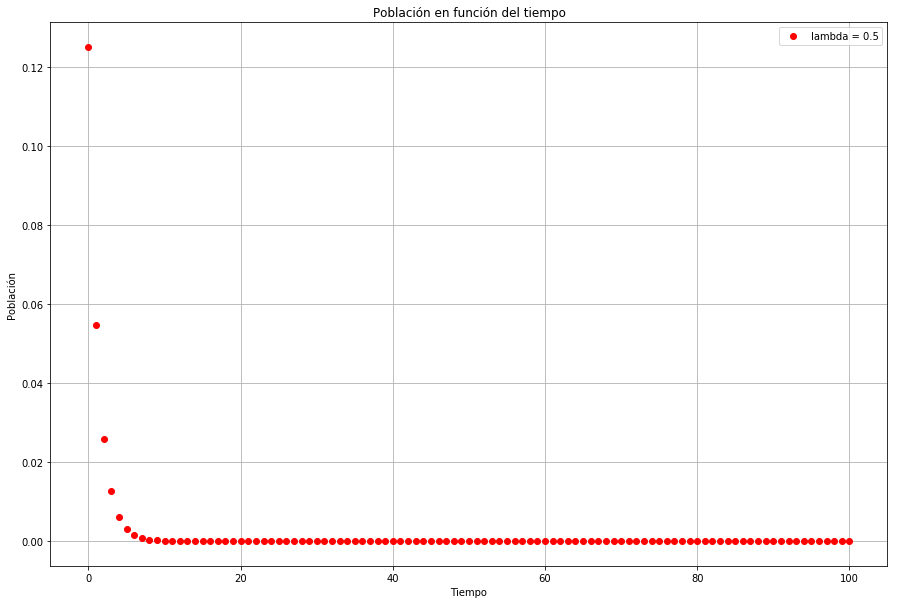

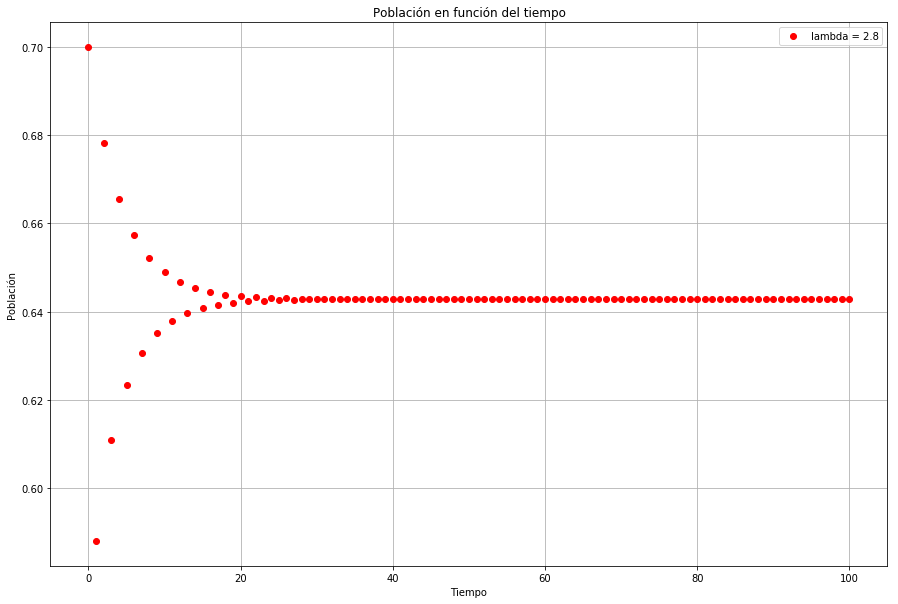

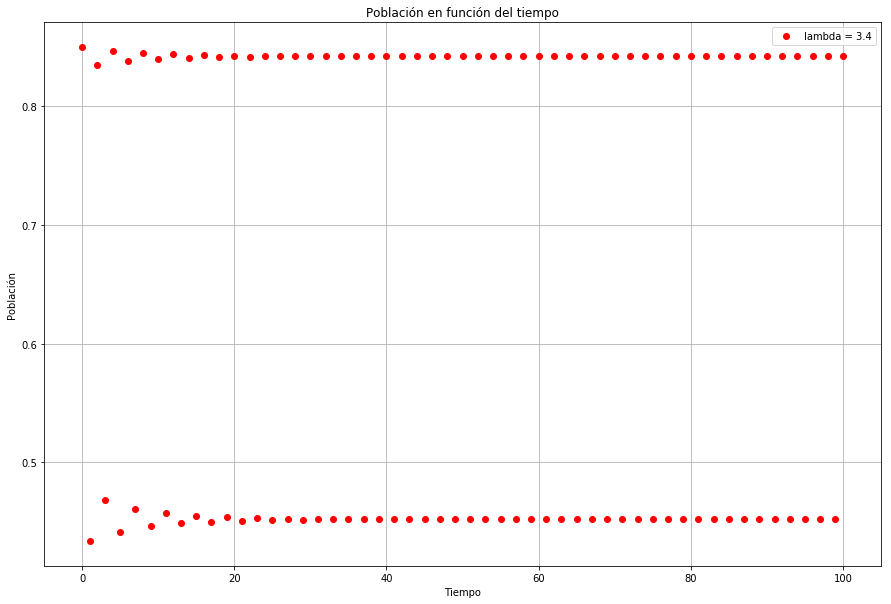

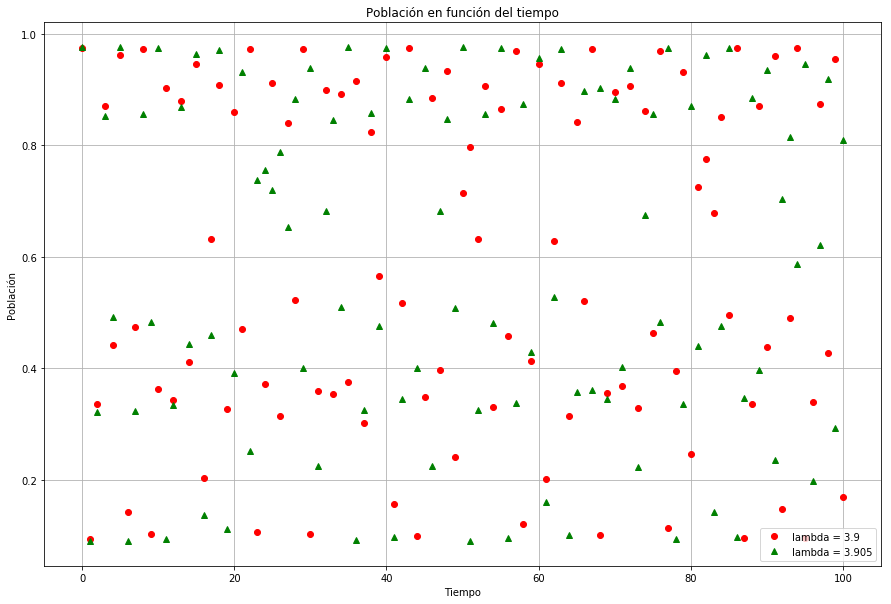

In [2]:
#logistic.py
#Este programa genera valores para la ecuación logística, dado una población inicial y un parámetro lambda.
import matplotlib.pyplot as plt
import numpy as np

def logistic(pop, fertility):
    return fertility * pop * (1 - pop)

def generate_logistic_data(pop, fertility, NMAX, tValues, popValues):
    
    iteration = 0
    t = 0
    
    while(iteration < NMAX):
    
        pop = logistic(pop, fertility)

        tValues.append(t)
        popValues.append(pop)

        t += 1
        iteration += 0.1


tValues, popValues = [], []
pop, fertility, NMAX = 0.5, 0.5, 10
generate_logistic_data(pop, fertility, NMAX, tValues, popValues)

plt.figure(figsize=(15,10))
plt.plot(tValues, popValues, 'ro', label = 'lambda = ' + str(fertility)) 
plt.title('Población en función del tiempo')
plt.ylabel('Población')
plt.xlabel('Tiempo')
plt.grid()
plt.legend()
plt.show()

tValues, popValues = [], []
pop, fertility, NMAX = 0.5, 2.8, 10
generate_logistic_data(pop, fertility, NMAX, tValues, popValues)

plt.figure(figsize=(15,10))
plt.plot(tValues, popValues, 'ro', label = 'lambda = ' + str(fertility)) 
plt.title('Población en función del tiempo')
plt.ylabel('Población')
plt.xlabel('Tiempo')
plt.grid()
plt.legend()
plt.show()

tValues, popValues = [], []
pop, fertility, NMAX = 0.5, 3.4, 10
generate_logistic_data(pop, fertility, NMAX, tValues, popValues)

plt.figure(figsize=(15,10))
plt.plot(tValues, popValues, 'ro', label = 'lambda = ' + str(fertility)) 
plt.title('Población en función del tiempo')
plt.ylabel('Población')
plt.xlabel('Tiempo')
plt.grid()
plt.legend()
plt.show()

################################################################################# COMPARISON GRAPHS

tValues1, popValues1 = [], []
pop, fertility1, NMAX = 0.5, 3.9, 10

generate_logistic_data(pop, fertility1, NMAX, tValues1, popValues1)

tValues2, popValues2 = [], []
pop, fertility2, NMAX = 0.5, 3.905, 10

generate_logistic_data(pop, fertility2, NMAX, tValues2, popValues2)

plt.figure(figsize=(15,10))
plt.plot(tValues1, popValues1, 'ro', label = 'lambda = ' + str(fertility1)) 
plt.plot(tValues2, popValues2, 'g^', label = 'lambda = ' + str(fertility2)) 
plt.title('Población en función del tiempo')
plt.ylabel('Población')
plt.xlabel('Tiempo')
plt.grid()
plt.legend()
plt.show()


#generate_logistic_data(pop = 0.5, fertility = 3.8, NMAX = 10)

#generate_logistic_data(pop = 0.5, fertility = 3.81, NMAX = 10)


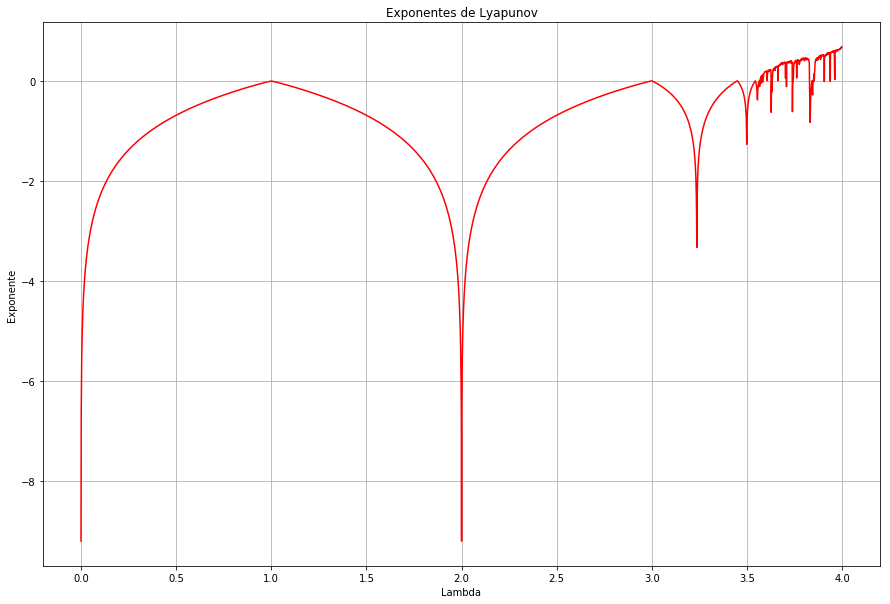

In [4]:
#bifurcation.py
#Este programa genera el diagrama de bifurcación y los exponentes de Lyapunov mencionados en el artículo.
import matplotlib.pyplot as plt
import numpy as np

def logistic(pop, fertility):
    return fertility * pop * (1 - pop)

def lyapunov(pop, fertility):
    return np.log(np.absolute(fertility - 2 * fertility * pop))

NMAX = 1000
FMAX = 4
pop = 0.5
#fertility = 3.5
fertility = 0.0001
lyapunovExponents, fertilityValues = [], []
lya = 0

result = []

plt.figure(figsize=(15,10))

while(fertility < FMAX):
    t = 0
    pop = 0.5
    lya = 0
    
    while(t < NMAX):

        pop = logistic(pop, fertility)
        lya = lya + lyapunov(pop, fertility)
        
        #if(t > 900):
         #   plt.plot(fertility, pop, color = 'red', ls='',marker=',', ) #para graficar bifurcación

        t += 1        
    
    #lambdas.append(mean(result))
    lyapunovExponents.append(lya/NMAX)
    fertilityValues.append(fertility)
    
    fertility += 0.00125
    
plt.plot(fertilityValues, lyapunovExponents, color = 'red') #para graficar lyapunov
plt.title('Exponentes de Lyapunov')
plt.ylabel('Exponente')

#plt.title('Diagrama de Bifurcación') #para graficar bifuración
#plt.ylabel('Población atractora')

plt.xlabel('Lambda')
plt.grid()
plt.show()

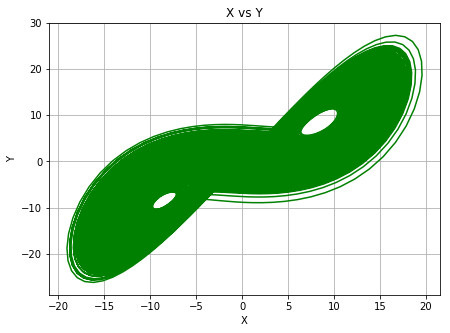

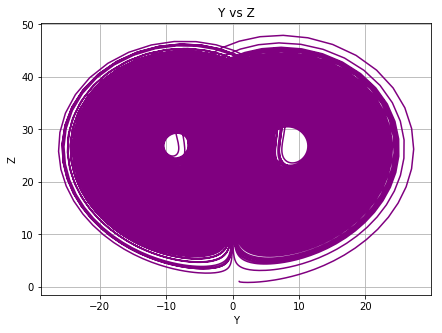

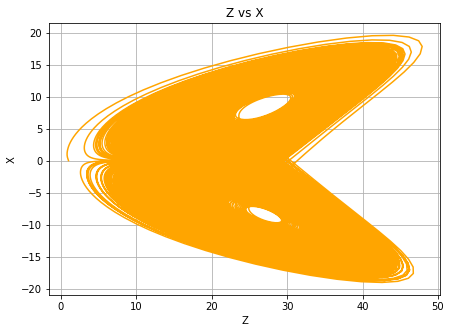

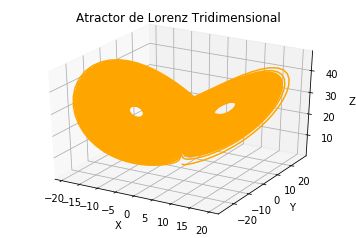

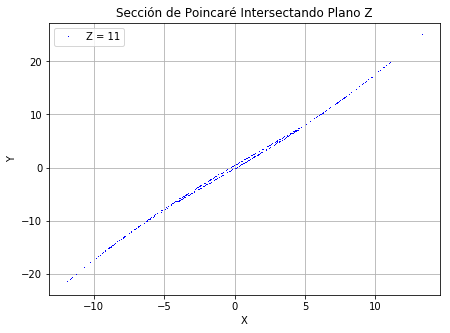

In [2]:
#lorenz.py
#Este programa resuelve numéricamente el sistema de ecuaciones de Saltzman para generar un atractor de Lorenz.

from scipy.integrate import odeint
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np


#sistema de ecuaciones a resolver
def saltzman(AR, t, sigma = 10, r = 28, b = 8/3):
    x = AR[0]
    y = AR[1]
    z = AR[2]
    
    dxdt = sigma * (y - x)
    dydt = x * (r - z) - y
    dzdt = x * y - b * z
    
    return [dxdt, dydt, dzdt]

#condiciones iniciales
initialConditions = [0, 1, 1.05]

#t = np.linspace(0, 50, 5000)
t = np.linspace(0, 1000, 100000)

solution = odeint(saltzman, initialConditions, t)

x = solution[:,0]
y = solution[:,1]
z = solution[:,2]

#POINCARÉ SECTION

axis1, axis2 = [], []

for i in range(100000):
    if float(format(solution[:, 2][i], '0.1f')) == 16: #plano intersectante
        axis1.append(solution[:, 0][i])  
        axis2.append(solution[:, 1][i])  

plt.figure(figsize=(7,5))
plt.plot(x, y, color = 'green')
plt.title('X vs Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(y, z, color = 'purple')
plt.title('Y vs Z')
plt.xlabel('Y')
plt.ylabel('Z')
plt.grid()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(z, x, color = 'orange')
plt.title('Z vs X')
plt.xlabel('Z')
plt.ylabel('X')
plt.grid()
plt.show()

ax = plt.axes(projection='3d')
ax.set_title('Atractor de Lorenz Tridimensional')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.plot3D(x, y, z, 'orange')

plt.figure(figsize=(7,5))
plt.plot(axis1, axis2, color = 'blue', ls='',marker=',', label = 'Z = 11')
plt.title('Sección de Poincaré Intersectando Plano Z')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.legend()
plt.show()



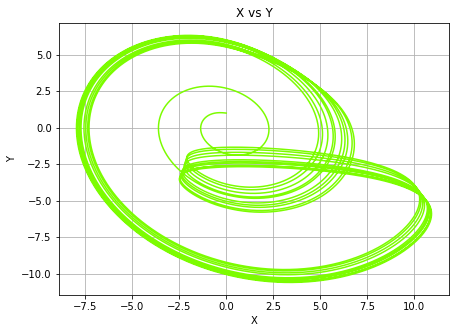

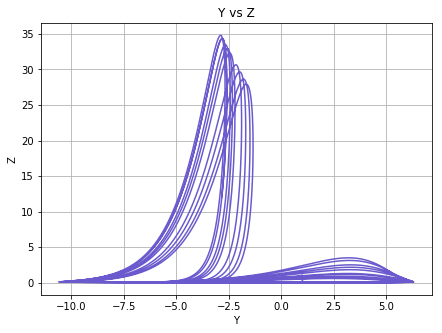

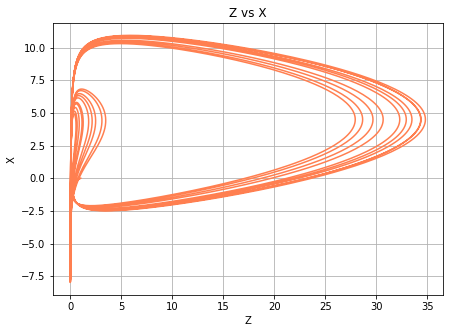

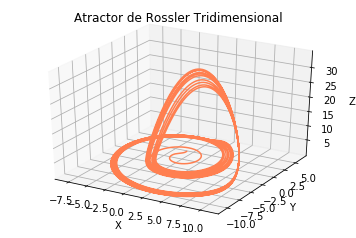

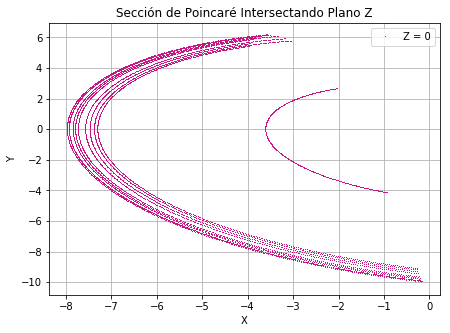

In [29]:
#rossler.py
#Este programa resuelve numéricamente el sistema de ecuaciones para generar un atractor de Rossler.

from scipy.integrate import odeint
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np


#sistema de ecuaciones a resolver
def rossler(AR, t, A = 0.32, B = 0.3, C = 4.5):
    x = AR[0]
    y = AR[1]
    z = AR[2]
    
    dxdt = -y - z
    dydt = x + A * y
    dzdt = B + z * (x - C)
    
    return [dxdt, dydt, dzdt]

#condiciones iniciales
initialConditions = [0, 1, 1.05]

t = np.linspace(0, 100, 20000)
#t = np.linspace(0, 1000, 100000) #usable

solution = odeint(rossler, initialConditions, t)

x = solution[:,0]
y = solution[:,1]
z = solution[:,2]

#POINCARÉ SECTION

axis1, axis2 = [], []

for i in range(20000):
    if float(format(solution[:, 2][i], '0.1f')) == 0: #plano intersectante
        axis1.append(solution[:, 0][i])  
        axis2.append(solution[:, 1][i])  

plt.figure(figsize=(7,5))
plt.plot(x, y, color = 'lawngreen')
plt.title('X vs Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(y, z, color = 'slateblue')
plt.title('Y vs Z')
plt.xlabel('Y')
plt.ylabel('Z')
plt.grid()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(z, x, color = 'coral')
plt.title('Z vs X')
plt.xlabel('Z')
plt.ylabel('X')
plt.grid()
plt.show()

ax = plt.axes(projection='3d')
ax.set_title('Atractor de Rossler Tridimensional')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.plot3D(x, y, z, 'coral')

plt.figure(figsize=(7,5))
plt.plot(axis1, axis2, color = 'mediumvioletred', ls='',marker=',', label = 'Z = 0')
plt.title('Sección de Poincaré Intersectando Plano Z')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.legend()
plt.show()


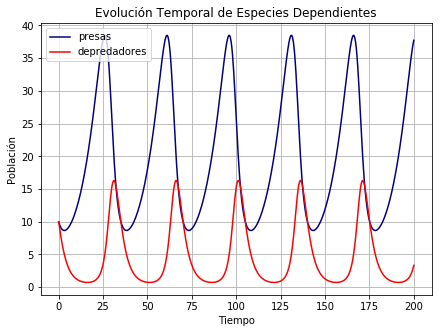

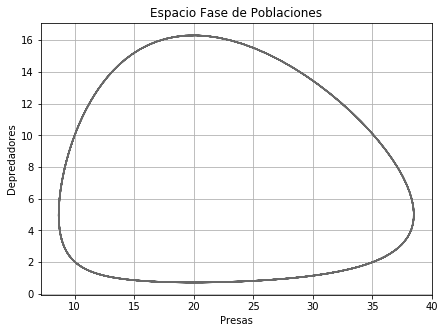

In [3]:
#lotka.py
#Este programa resuelve numéricamente el sistema de ecuaciones de Lotka-Volterra para 4 especies.

from scipy.integrate import odeint
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np

#sistema de ecuaciones a resolver
def lotka(AR, t, alpha = 0.1, beta = 0.02, gamma = 0.4, delta = 0.02):
    x = AR[0]
    y = AR[1]

    dxdt = alpha * x - beta * x * y
    dydt = delta * x * y - gamma * y
    return [dxdt, dydt]

#condiciones iniciales
initialConditions = [10, 10]

t = np.linspace(0, 200, 1000)
#t = np.linspace(0, 1000, 100000) #usable

solution = odeint(lotka, initialConditions, t)

x = solution[:,0]
y = solution[:,1]

plt.figure(figsize=(7,5))
plt.plot(t, x, color = 'navy', label = 'presas')
plt.plot(t, y, color = 'red', label = 'depredadores')
plt.title('Evolución Temporal de Especies Dependientes')
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(x, y, color = 'dimgrey')
plt.title('Espacio Fase de Poblaciones')
plt.xlabel('Presas')
plt.ylabel('Depredadores')
plt.grid()
plt.show()